# Import

In [1]:
!pwd
!python --version
!which python

/home/shpaik/21-aaai2022v2/Fig2/Sensitivity_prop
Python 3.6.10 :: Anaconda, Inc.
/home/shpaik/anaconda3/envs/py36/bin/python


In [2]:
import os
current_dir = os.getcwd()
print(current_dir)

# control the maximum number of threads that numpy uses by 8
os.environ["OMP_NUM_THREADS"] = "8" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "8" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "8" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "8" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "8" # export NUMEXPR_NUM_THREADS=6

/home/shpaik/21-aaai2022v2/Fig2/Sensitivity_prop


In [3]:
os.chdir("../../")
from lib_external.SCLUB import SCLUB
from lib_external.DyClu import DyClu
os.chdir(current_dir)

%run SYNTH_functions.ipynb

In [4]:
my_data = "SYNTH"

we_need_tuning = True # True: tuning will be inclued / False : use already tuned paramter

TUNED_V_LAM = {
    'Random': {'v': 0, 'lam': 0},
    'RGraphTS': {'v': 0, 'lam': 0},
    'LinTS': {'v': 0, 'lam': 0},
    'SemiRGraphTS': {'v': 0, 'lam': 0},
    'GraphUCBlocal': {'v': 0, 'lam': 0},
    'CLUB': {'v': 0, 'lam': 0},    
    'IndividualSemiRidgeGraphThompson': {'v': 0, 'lam': 0},
    'LinTS_Single': {'v': 0, 'lam': 0},
    'SemiTS_Single': {'v': 0, 'lam': 0},
    'SCLUB': {'v': 0, 'lam': 0},
    'DyClu': {'v': 0, 'lam': 0}
}

In [5]:
import numpy as np 
import networkx as nx
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.sparse import csgraph 
import scipy
import os
import random
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time
from datetime import datetime

In [6]:
plt.style.use("ggplot")

[]

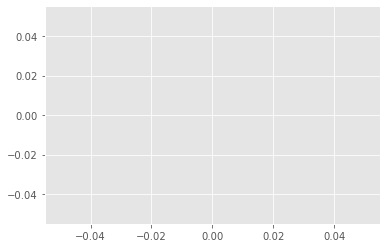

In [7]:
plt.figure()
plt.plot()

In [8]:
simul_n=5

# fix n, N, d, gamma
user_num = 30
arm_num = 10
dimension = 40
gamma = 5

# change proportion
# wrong_proportion = 0.1

time_horizon = 50000
tuning_time_horizon = 5000

nu_type = "1"
arm_type = "sparse"
our_graph_type = "ER" #"RBF"

IMG_FOLDER = "results/" + "prop_"+str(wrong_proportion) +"/arm="+arm_type +"_nu="+ nu_type +"_g="+our_graph_type
IMG_FOLDER_FOR_OS = current_dir+"/"+IMG_FOLDER

## Other settings

In [9]:
print("--------------------")
tuning_simul_n = 1

const_R = 0.1
delta = 0.05

################################## v_set and lam_set ##################################
v_set=[0.001, 0.01, 0.1, 0.5, 1.]
lam_set=[0.01, 0.1, 0.5, 1., 5]

v_num = len(v_set); lam_num = len(lam_set)
v_and_lam_num = v_num * lam_num

epsilon = 1
threshold = 0.5
prob = 0.4

lap_type = "random_walk"

##### For DyClu (default option) ####
dyclu_options = {
    'tau_e': 20, # size of sliding window,
    'alpha': 0.3,
    'delta_1': 1e-1,
    'delta_2': 1e-1,
    'change_detection_alpha': 0.01,
    'neighbor_identification_alpha': 0.01 ,
    'dataSharing': False, 
    'aggregationMethod': 'combine',
    'useOutdated': True ,
    'maxNumOutdatedModels': None, 
}

##### obsolete #####
const_alpha_2 = 0.15
const_tol_1 = dimension # * 10
const_tol_2 = const_tol_1 * 1e-5 
print(f"to1_1: {const_tol_1}, to1_2: {const_tol_2},")

--------------------
to1_1: 40, to1_2: 0.0004,


## Graph & Laplacian

In [10]:
our_graph, our_laplacian, users_features, symm_laplacian = set_graph_and_lapl_for_experiment(user_num, dimension, prob, threshold, our_graph_type, lap_type, gamma)

In [11]:
number_of_wrong_params=int(user_num*wrong_proportion)

indices=np.random.choice(np.arange(user_num),number_of_wrong_params,replace=False)

for i in indices:
    users_features[i]=-users_features[i]

## Tuning

In [12]:
selected_models=["SCLUB", "DyClu"]

In [13]:
if we_need_tuning == True:
        Labels, results = tuning_v_and_lam_for_SELECTED_algo_SYNTH(selected_models,\
                                                                   v_set, lam_set, user_num, arm_num, dimension, tuning_time_horizon, const_R, delta, tuning_simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)
else:
    print("No tuning.")

<set models>
RidgeTS, time = 0.0015833377838134766 sec
IndTS, time = 0.0006620883941650391 sec
SCLUB, time = 0.0011665821075439453 sec
CLUB, time = 0.0012705326080322266 sec
DyClu, time = 0.00018525123596191406 sec
SemiRidegeTS, time = 0.0010724067687988281 sec
GUCBlocal, time = 0.0018286705017089844 sec
IndividualSemiRidgeGraphThompson, time = 0.0006492137908935547 sec
LinTS_Single, time = 0.00014829635620117188 sec
SemiTS_Single, time = 3.147125244140625e-05 sec
(v= 0.001 lam= 0.01 ) 0 user: 1 / selected arms: 9 2 6 6 -1 6 6 5 8 8 4 9 / opt_arm: 6 / time : 0.02 sec
=====
iteration = 1/1, time = 1.112 sec
Random: 0.0189 ms
RGraphTS: 0.6424 ms
LinTS: 0.2529 ms
SCLUB: 0.3027 ms
slot4: 0.0 ms
CLUB: 0.7979 ms
DyClu: 4.7509 ms
SemiRGraphTS: 5.2331 ms
GraphUCBlocal: 0.5025 ms
IndividualSemiRidgeGraphThompson: 4.4595 ms
LinTS_Single: 0.285 ms
SemiTS_Single: 4.5563 ms
TOTAL TIME: 1.112 sec
v=0.001 / lam=0.01
<set models>
RidgeTS, time = 0.0012547969818115234 sec
IndTS, time = 0.00060653686523

## Choose best hyper parameters

Random


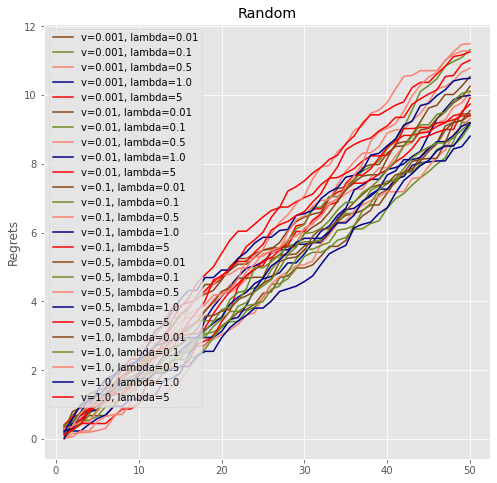

RGraphTS


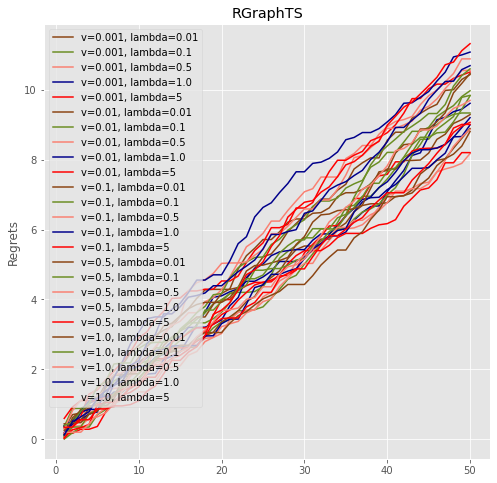

LinTS


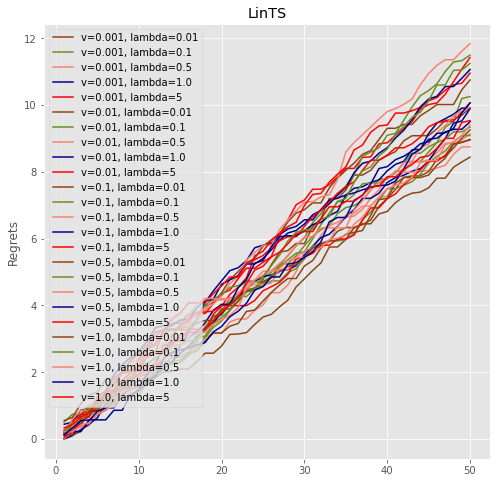

SemiRGraphTS


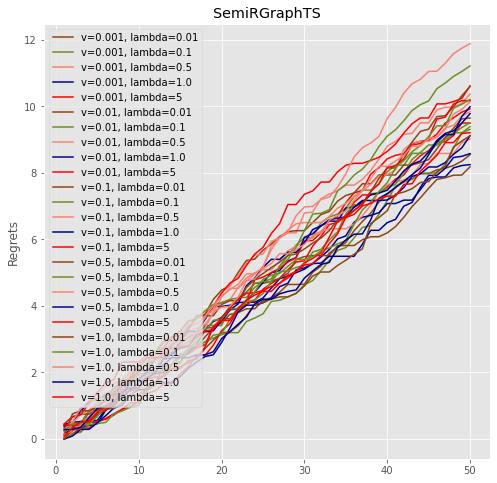

CLUB


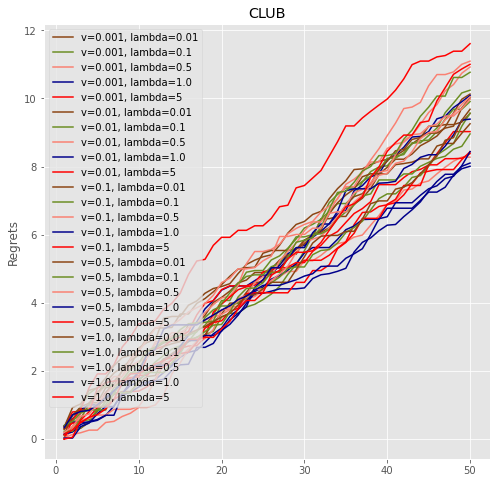

SCLUB


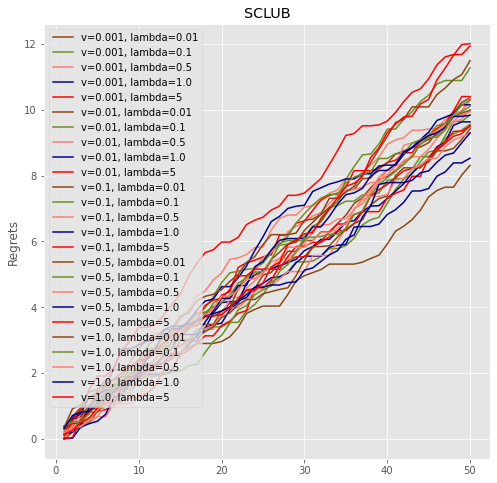

DyClu


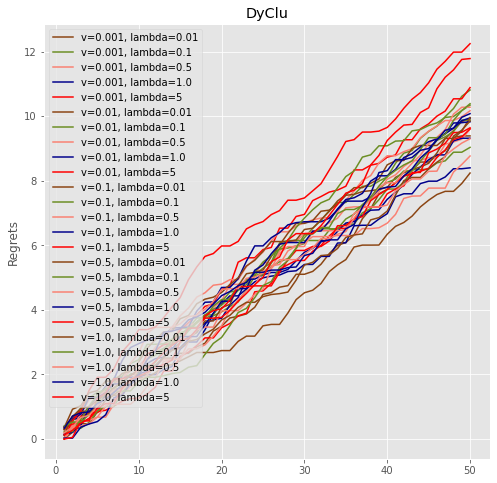

GraphUCBlocal


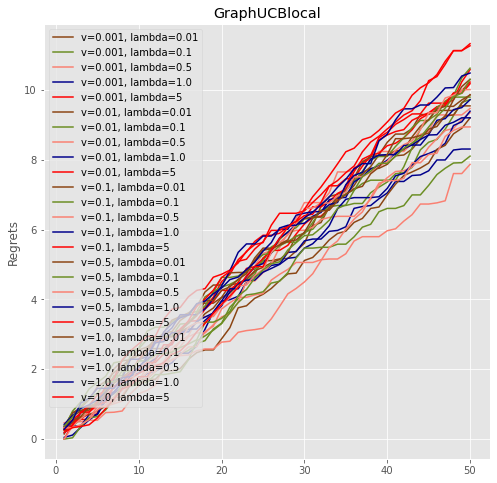

IndividualSemiRidgeGraphThompson


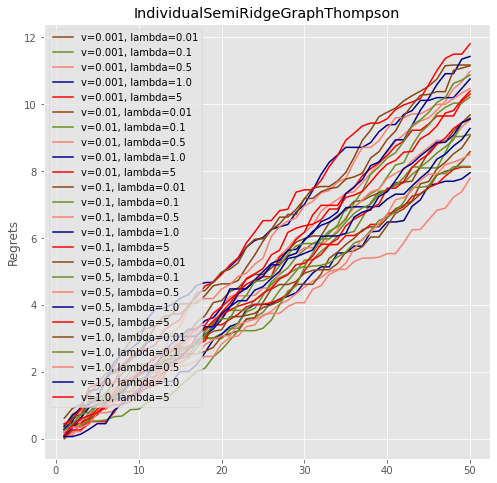

LinTS_Single


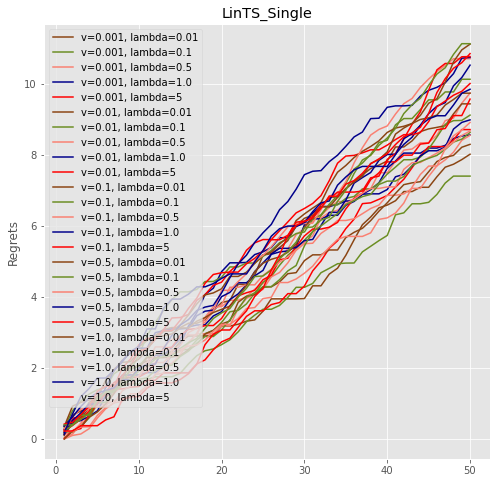

SemiTS_Single


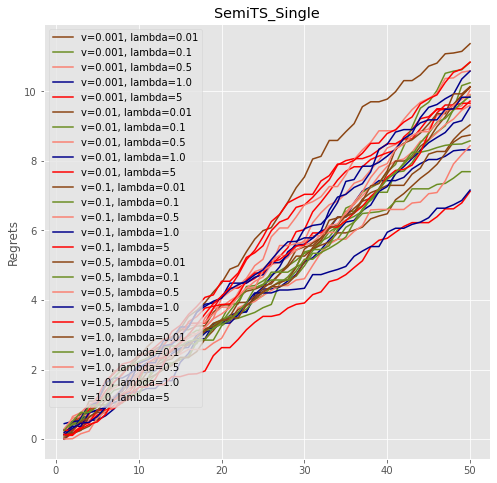

In [14]:
if we_need_tuning == True:
    algo_list = selected_models
    colors=["black", "darkred", "peru", "darkorange", "gold",
            "yellowgreen", "limegreen", "lightseagreen", "deepskyblue", "blue",
            "darkviolet", "magenta", "khaki", "plum", "grey",
            "steelblue", "lightcoral", "bisque", "darkolivegreen", "darkcyan",
            "saddlebrown", "olivedrab", "salmon", "darkblue", "red",
            "black", "darkred", "peru", "darkorange", "gold"]

    colors_by_lam = []
    temp = colors[20:20+lam_num]
    for i in range(v_num):
        colors_by_lam += temp

    colors_by_v = []
    for i in range(lam_num):
        temp = [colors[20+i] for j in range(v_num)]
        colors_by_v += temp

    RT_dict = {}
    for MODEL in algo_list:
        print(MODEL)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors, Labels, results)
        RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_lam, Labels, results)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_v, Labels, results)
else:
    print("No tuning.")

## Checkpoint: best tuning result of each algorithm

#n=30,arms=10,d=40,T=50,arm_type=sparse
Random: v= 0.01, lam = 1.0
RGraphTS: v= 0.001, lam = 0.5
LinTS: v= 0.1, lam = 0.01
SCLUB: v= 0.01, lam = 0.01
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.01, lam = 1.0
DyClu: v= 0.01, lam = 0.01
SemiRGraphTS: v= 0.01, lam = 0.01
GraphUCBlocal: v= 0.1, lam = 0.5
IndividualSemiRidgeGraphThompson: v= 0.1, lam = 0.5
LinTS_Single: v= 0.001, lam = 0.1
SemiTS_Single: v= 0.01, lam = 5



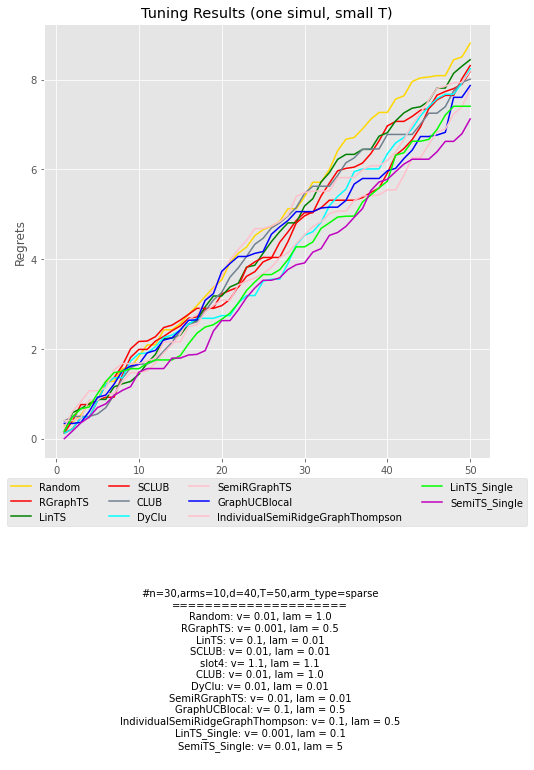

In [15]:
colors = ["gold", "r","g","r","k","slategrey","aqua","pink", "blue", "pink", "lime", "m"]
if we_need_tuning == True:
    best_v_lam_pair_dict, tuning_info = return_best_v_and_lambda_pair_real(selected_models, user_num, arm_num, dimension, tuning_time_horizon, arm_type, colors, results, RT_dict)
    # synthetic data also uses "return_best_..._pair_real"
else:
    print("No tuning.")
    best_v_lam_pair_dict = TUNED_V_LAM
    tuning_info = "No tuning.\n"+ str(TUNED_V_LAM).replace('}, ', '}\n')[1:-1]

In [16]:
print("we_need_tuning =", we_need_tuning)
best_v_lam_pair_dict

we_need_tuning = True


{'Random': {'v': 0.01, 'lam': 1.0},
 'RGraphTS': {'v': 0.001, 'lam': 0.5},
 'LinTS': {'v': 0.1, 'lam': 0.01},
 'SCLUB': {'v': 0.01, 'lam': 0.01},
 'slot4': {'v': 1.1, 'lam': 1.1},
 'CLUB': {'v': 0.01, 'lam': 1.0},
 'DyClu': {'v': 0.01, 'lam': 0.01},
 'SemiRGraphTS': {'v': 0.01, 'lam': 0.01},
 'GraphUCBlocal': {'v': 0.1, 'lam': 0.5},
 'IndividualSemiRidgeGraphThompson': {'v': 0.1, 'lam': 0.5},
 'LinTS_Single': {'v': 0.001, 'lam': 0.1},
 'SemiTS_Single': {'v': 0.01, 'lam': 5}}

## Final simulation with best hyper parameters

In [17]:
cumulated_regret_dict, info_computing_time = run_all_algo_with_best_v_lam_SYNTH(selected_models,\
                                                                                best_v_lam_pair_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)

<set models>
RidgeTS, time = 0.0008022785186767578 sec
IndTS, time = 0.0004265308380126953 sec
SCLUB, time = 0.0012505054473876953 sec
CLUB, time = 0.0009968280792236328 sec
DyClu, time = 0.00016450881958007812 sec
SemiRidegeTS, time = 0.0008273124694824219 sec
GUCBlocal, time = 0.0013484954833984375 sec
IndividualSemiRidgeGraphThompson, time = 0.0005156993865966797 sec
LinTS_Single, time = 0.0002269744873046875 sec
SemiTS_Single, time = 2.4318695068359375e-05 sec
0 user: 17 / selected arms: 4 0 2 5 -1 5 5 6 1 5 9 5 / opt_arm: 5 / time : 0.02 sec
=====
iteration = 1/5, time = 13.628 sec
<set models>
RidgeTS, time = 0.0011777877807617188 sec
IndTS, time = 0.0006608963012695312 sec
SCLUB, time = 0.001123189926147461 sec
CLUB, time = 0.0014841556549072266 sec
DyClu, time = 0.00028395652770996094 sec
SemiRidegeTS, time = 0.0009794235229492188 sec
GUCBlocal, time = 0.0016605854034423828 sec
IndividualSemiRidgeGraphThompson, time = 0.0006246566772460938 sec
LinTS_Single, time = 8.27312469482

## Final plot

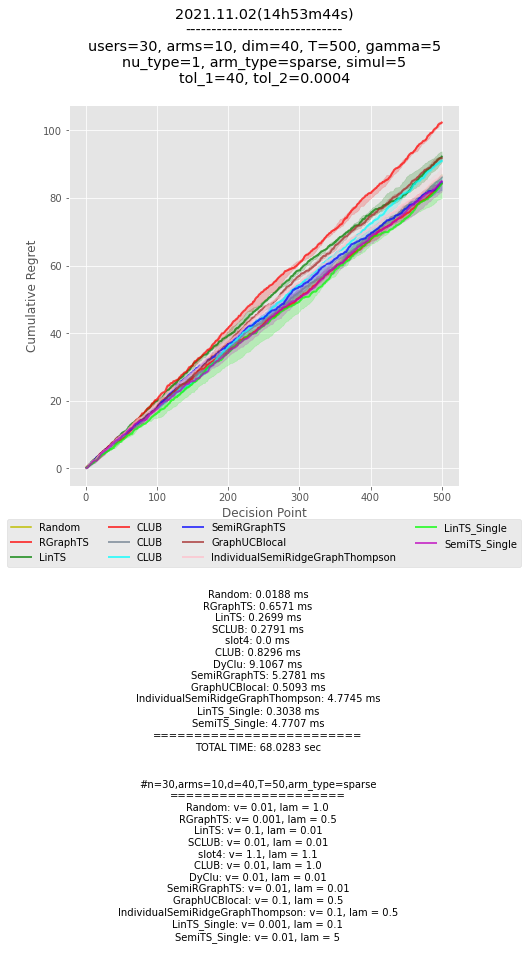


<parameters>
user_num = 30 / arm_num = 10 / dimension = 40
delta = 0.05 / R = 0.1 / gamma (for smooth Theta) = 5
-----
const_tol_1 = 40 / const_tol_2 = 0.0004
graph = ER / laplacian=random_walk / threshold = 0.5 / prob = 0.4 / const_alpha_2 = 0.15
########################################

<mean computing time>
Random: 0.0188 ms
RGraphTS: 0.6571 ms
LinTS: 0.2699 ms
SCLUB: 0.2791 ms
slot4: 0.0 ms
CLUB: 0.8296 ms
DyClu: 9.1067 ms
SemiRGraphTS: 5.2781 ms
GraphUCBlocal: 0.5093 ms
IndividualSemiRidgeGraphThompson: 4.7745 ms
LinTS_Single: 0.3038 ms
SemiTS_Single: 4.7707 ms
TOTAL TIME: 68.0283 sec
########################################

<best tuning parameter>
#n=30,arms=10,d=40,T=50,arm_type=sparse
Random: v= 0.01, lam = 1.0
RGraphTS: v= 0.001, lam = 0.5
LinTS: v= 0.1, lam = 0.01
SCLUB: v= 0.01, lam = 0.01
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.01, lam = 1.0
DyClu: v= 0.01, lam = 0.01
SemiRGraphTS: v= 0.01, lam = 0.01
GraphUCBlocal: v= 0.1, lam = 0.5
IndividualSemiRidgeGraphThompson: v= 0.1, 

In [18]:
NOW = datetime.now().strftime('%Y.%m.%d(%Hh%Mm%Ss)')
IMG_NAME = "arm="+arm_type +"_nu="+ nu_type +"_g="+our_graph_type+"_T="+str(time_horizon) + "_simul"+str(simul_n) +"("+ NOW+ ").png"
IMG_PATH = IMG_FOLDER+"/"+IMG_NAME

if not os.path.exists(IMG_FOLDER_FOR_OS):
    os.makedirs(IMG_FOLDER_FOR_OS)

SAVE = True # False

const_linewidth = 2
const_transparency = 0.7
const_cut_random = 20 # Random
const_cut_semi = 1 # SemiRGraphTS

show_and_save_plot(SAVE, const_linewidth, const_transparency, const_cut_random, const_cut_semi, cumulated_regret_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, lap_type, our_graph_type, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type, info_computing_time, tuning_info, IMG_PATH, NOW)


In [19]:
print(NOW)

2021.11.02(14h53m44s)


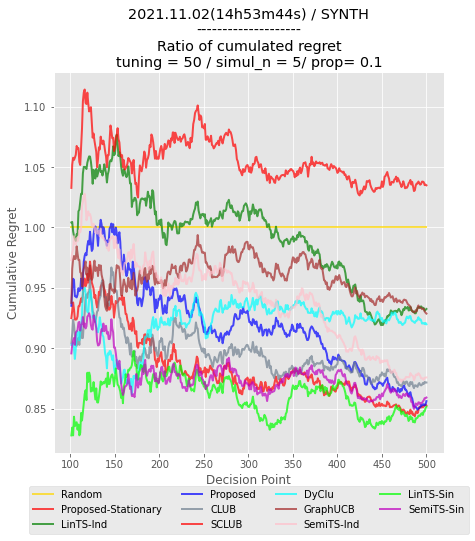

In [20]:
start = 100 # ignore round 1 to "start"
steps=np.arange(start+1,time_horizon+1)

LW = const_linewidth
TP = const_transparency
plt.figure(figsize=(7,7))

colors_dict = {"Random": "gold",
               "RGraphTS" : "r",
               "LinTS" : "g",
               "SemiRGraphTS" : "blue",
               "GraphUCBlocal" : "brown",
               "CLUB" : "slategrey",
               "SCLUB" : "r",
               "DyClu" : "aqua",
               "IndividualSemiRidgeGraphThompson" : "pink",
               "LinTS_Single" : "lime",
               "SemiTS_Single": "m"}

labels_dict = {"Random": "Random",
               "RGraphTS" : "Proposed-Stationary",
               "LinTS" : "LinTS-Ind",
               "SemiRGraphTS" : "Proposed",
               "GraphUCBlocal" : "GraphUCB",
               "CLUB" : "CLUB",
               "SCLUB" : "SCLUB",
               "DyClu" : "DyClu",
               "IndividualSemiRidgeGraphThompson" : "SemiTS-Ind",
               "LinTS_Single" : "LinTS-Sin",
               "SemiTS_Single": "SemiTS-Sin"}

denominator = np.median(cumulated_regret_dict["Random"], axis=0)[start:]

for MODEL in selected_models:
    COLOR = colors_dict[MODEL]
    numerator = np.median(cumulated_regret_dict[MODEL], axis=0)[start:]
    fraction = np.divide(numerator, denominator)
    plt.plot(steps, fraction, COLOR, linewidth = LW, alpha =  TP, label=labels_dict[MODEL])
    
plt.xlabel('Decision Point')
plt.ylabel('Cumulative Regret')
if we_need_tuning == True:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + str(tuning_time_horizon)+" / simul_n = " + str(simul_n) +"/ prop= "+str(wrong_proportion))
else:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + "NO"+" / simul_n = " + str(simul_n) +"/ prop= "+str(wrong_proportion))
plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15),fancybox=True,ncol=4)

if SAVE == True:
    RATIO_FOLDER = IMG_FOLDER+"/ratio_image_folder"
    RATIO_FOLDER_FOR_OS = current_dir+"/"+ RATIO_FOLDER
    if not os.path.exists(RATIO_FOLDER_FOR_OS):
        os.makedirs(RATIO_FOLDER_FOR_OS)
        
    plt.savefig(RATIO_FOLDER+"/"+ "ratio_" +my_data + "_" + IMG_NAME, bbox_inches='tight')
    
plt.show()

In [21]:
if SAVE == True:
    REGRET_FOLDER = IMG_FOLDER+"/regret_saving_folder/regret_"+NOW
    REGRET_FOLDER_FOR_OS = current_dir+"/"+REGRET_FOLDER
    if not os.path.exists(REGRET_FOLDER_FOR_OS):
        os.makedirs(REGRET_FOLDER_FOR_OS)

    for MODEL in selected_models:
        np.save(REGRET_FOLDER+'/cumulated_regret_'+ MODEL +"_prop_"+str(wrong_proportion)+'.npy', cumulated_regret_dict[MODEL])